In [448]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [449]:
X,y = make_classification(n_samples=10000, n_features=100, n_informative=99,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [455]:
lg = LogisticRegression(penalty='l2',C=1/(2*0.004),solver='liblinear', max_iter=200)
lg.fit(X_train,y_train)
y_pred_sklearn = lg.predict(X_test)
print(lg.coef_,lg.intercept_)



[[ 0.01540902  0.00700142  0.09626616  0.07150765 -0.09962642  0.0102566
   0.19675433  0.0179843  -0.07998826 -0.02010313  0.04526448 -0.06025824
   0.02091673 -0.02007851  0.00686627  0.03521297 -0.10905308  0.0021096
  -0.048317   -0.11652629 -0.02365766  0.0895453  -0.00154558  0.04119973
   0.13422981  0.01447508  0.10612478 -0.06413443 -0.01053078  0.05362042
   0.01297784  0.00199687  0.06857107 -0.02702486  0.01234991 -0.06221938
   0.02553532  0.11703191 -0.06256231 -0.08338657 -0.04836251 -0.07006202
   0.14268832 -0.0300649  -0.01769519 -0.07144187  0.05732455  0.01926764
  -0.02456052 -0.02361014  0.07767602  0.00848543 -0.02123702  0.02381217
   0.04110186 -0.01695007 -0.02559222 -0.00555138 -0.03421094 -0.04246625
  -0.02617041  0.01217874  0.01593934 -0.19029107 -0.11041572 -0.00688758
  -0.02540988 -0.02384251 -0.03327897  0.10619877 -0.00683845 -0.03880176
   0.06152804 -0.0308017  -0.04405967  0.03292257  0.00557105 -0.10465605
   0.01649547  0.03556234  0.03624679 -0

In [451]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [452]:
def calculate_cost(X, y, W, alpha):
    m = len(y)  # Number of training examples

    # Predicted probabilities
    y_hat = sigmoid(np.dot(X, W))

    # Log-loss (avoid log(0) by adding a small epsilon)
    epsilon = 1e-15  # To prevent log(0) errors
    log_loss = - (1 / m) * np.sum(
        y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon)
    )

    # L2 Regularization (excluding bias term W[0])
    regularization = alpha * np.sum(W[1:] ** 2)

    # Total cost
    total_cost = log_loss + regularization
    return total_cost

In [453]:
class LogWithLin:
    def __init__(self,alpha,epochs,lr):
        self.epoch = epochs
        self.lr = lr
        self.alpha = alpha
        self.coef_ = None
    def fit(self,X,y):
        costs = []
        X = np.insert(X, 0, 1, axis=1)  # Add bias term to X
        W = np.zeros(X.shape[1])  # Initialize weights, including bias term
        
        # Gradient descent
        for epoch in range(self.epoch):
            y_hat = sigmoid(np.dot(X, W))  # Predicted values using the sigmoid function
            
            # Calculate gradient with regularization (excluding the bias term)
            # gradient = (1 / X.shape[0]) * np.dot(X.T, (y_hat - y))  # Logistic regression gradient
            gradient = - (1 / X.shape[0]) * np.dot((y - y_hat),X)  # Logistic regression gradient
            regularization = 2 * self.alpha * W  # Regularization term
            regularization[0] = 0  # Exclude bias term from regularization
            
            # Update weights
            W = W - self.lr * (gradient + regularization)
            
            costs.append(calculate_cost(X,y,W,self.alpha))
        plt.plot(np.arange(0,self.epoch),costs)
        self.coef_ = W
        # print(W[1:],W[0])
        # print(lg.coef_,lg.intercept_)
        # m, b = lg.coef_[0][0] / lg.coef_[0][1], lg.intercept_[0]/lg.coef_[0][1]
        # XX = np.linspace(-4,5,100)
        # print(m,b)
        # plt.plot(XX, m * XX + b)
        # # plt.scatter(X[:,0],X[:,1])
        # m, b = W[1] / W[2],  W[0] / W[2]
        # print(m,b)
        # plt.plot(XX, m * XX + b)
        # plt.show()
    def predict(self,X):
        if X.shape[1] == len(self.coef_) - 1:
            X = np.insert(X, 0, 1, axis=1)
        y_hat = sigmoid(np.dot(X, self.coef_))
    
        # Convert probabilities to class labels (threshold = 0.5)
        return (y_hat >= 0.5).astype(int)

Accuracy (My Model): 0.799
Accuracy (sklearn Model): 0.799


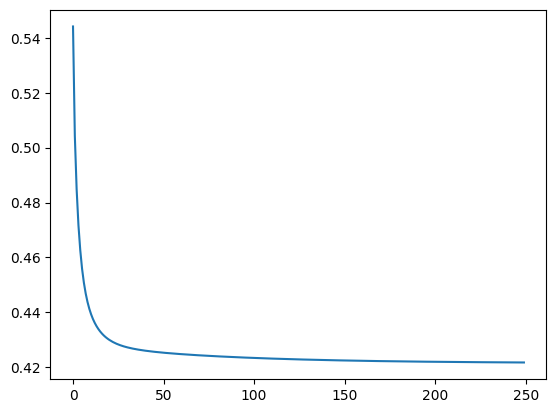

In [454]:
logLin = LogWithLin(0.01,250,0.1)
logLin.fit(X_train,y_train)
y_pred_my_model = logLin.predict(X_test)
accuracy_my_model = accuracy_score(y_test, y_pred_my_model)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Accuracy (My Model): {accuracy_my_model}")
print(f"Accuracy (sklearn Model): {accuracy_sklearn}")